Pengaturan

 Perkenalan
 
Nama : Aneke Karina Indriani
email : anekekarina99@gmail.com
Username : aneke_karina99
No.telpon :081335283245
Tempat tinggal : Kota Yogyakarta
Lahir : Semarang,06-09-1999
Pendidikan Terakhir : SMA
Perusahaan institusi : Universitas Negeri Diponegoro
Pekerjaan : Pelajar/Mahasiswa

In [1]:
#from numpy.random import seed
#seed(101)
#from tensorflow import set_random_seed
#set_random_seed(101)

import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline


load image

In [2]:
#download modul
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-02-13 07:33:00--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.75MB/s    in 54s     

2021-02-13 07:33:54 (5.74 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#membuka file zip yang sudah di download
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'



In [4]:
#melihat isi data
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [5]:
#jumlah masing masing kategori

#rock
print("jumlah img rock :",len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/rock')))

#paper
print("jumlah img paper :",len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/paper')))

#scissors
print("jumlah img scissors :",len(os.listdir('/tmp/rockpaperscissors/rps-cv-images/scissors')))

jumlah img rock : 726
jumlah img paper : 712
jumlah img scissors : 750


Trainning dan Testing

In [6]:
#membuat direktori untuk melakukan trainning dan testing
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
train_dir = os.path.join(base_dir,'train')
valid_dir = os.path.join(base_dir, 'val')

#menggunakan os.mkdir
os.makedirs(train_dir,exist_ok=True)
os.makedirs(valid_dir,exist_ok=True)

In [8]:
#menggabungkan beberapa jenis scissors,paper,jadi satu
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir,'scissors')

#trainning dan testing/validation

#scissors
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir),test_size=0.2)

#paper
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir),test_size=0.2)

#rock
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir),test_size=0.2)

In [9]:
#menggabungkan beberapa direktori
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(valid_dir, 'rock')
val_paper = os.path.join(valid_dir, 'paper')
val_scissors = os.path.join(valid_dir, 'scissors')
 
#membuat direktori baru
#train
os.makedirs(train_rock,exist_ok=True)
os.makedirs(train_paper,exist_ok=True)
os.makedirs(train_scissors,exist_ok=True)
 
#validation
os.makedirs(val_rock,exist_ok=True)
os.makedirs(val_paper,exist_ok=True)
os.makedirs(val_scissors,exist_ok=True)

In [10]:
# meng copy data train dan data val ke directory baru
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [11]:
#membuat image data generator train dan testing
train_datagen = ImageDataGenerator(
              rescale = 1./255,  
              rotation_range=20,
              horizontal_flip = True,
              shear_range=0.2,
              fill_mode = 'nearest',
)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
 
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


Membuat Model

In [13]:
#membuat model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [14]:
#model di compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
      print("\nReached 80% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [18]:


hist= model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/20
25/25 - 46s - loss: 0.2924 - accuracy: 0.9137 - val_loss: 0.1412 - val_accuracy: 0.9500

Reached 80% accuracy. Stop Training


Akurasi dan validasi

In [22]:
#akurasi
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

print("akurasi adalah", accuracy)
print("akurasi validation adalah", val_accuracy)

akurasi adalah [0.9137499928474426]
akurasi validation adalah [0.949999988079071]


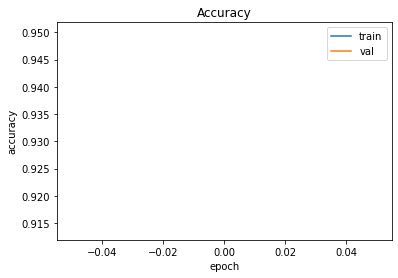

In [30]:
#cek underfitting/overfitting atau fitting
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

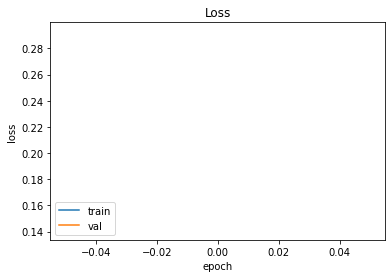

In [26]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

Upload file dan prediksi

In [28]:

import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmph35fs9x9/assets


INFO:tensorflow:Assets written to: /tmp/tmph35fs9x9/assets
